## Contents

01. Removing personally identifiable information
02. Merging department dataset to ords_prods_all
03. Identifying regions 
04. Using crosstab to identify high spend regions
05. Creating a subset excluding low activity customers 
06. Pie chart of products purchased by loyalty_flag
07. Bar chart of products purchased by department 
08. Customer demographics graphs 



In [1]:
#import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import data

path = r'/Users/lindazhang/Instacart Basket Analysis'
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))
departments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments_2.csv'))

## 01. Removing personally identifiable information

In [3]:
# Dropping first and last name columns to remove personally identifiable information. Also dropping _merge. 

ords_prods_all = ords_prods_all.drop(columns = ['First Name', 'last_name', '_merge'])

In [4]:
# checking that first name and last name were dropped 

ords_prods_all.columns

Index(['order_id', 'customer_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'product_name', 'department_id', 'prices', 'price_range', 'busiest_day',
       'busiest_days', 'period_of_day', 'busiest_periods', 'max_order',
       'loyalty_flag', 'mean_spend', 'spend_flag',
       'median_days_since_prior_order', 'customer_frequency', 'Gender',
       'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

## 02. Merging department dataset to ords_prods_all

In [5]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [6]:
# inner joining the departments and ords_prods_all data sets using department_id

ords_prods_all = ords_prods_all.merge(departments, on = ['department_id'], indicator = True)

In [7]:
# Taking a look at the dataset columns

ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32433030 entries, 0 to 32433029
Data columns (total 30 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       int64         
 1   customer_id                    int64         
 2   order_number                   int64         
 3   orders_day_of_week             int64         
 4   order_hour_of_day              int64         
 5   days_since_prior_order         float64       
 6   product_id                     int64         
 7   product_name                   object        
 8   department_id                  int64         
 9   prices                         float64       
 10  price_range                    object        
 11  busiest_day                    object        
 12  busiest_days                   object        
 13  period_of_day                  object        
 14  busiest_periods                object        
 15  max_order    

In [8]:
# dropping _merge and date_joined

ords_prods_all = ords_prods_all.drop(columns = ['_merge', 'date_joined'])

## 03. Identifying regions 

In [9]:
# Lists of states by region 

Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky',
       'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon',
      'California','Hawaii']



In [10]:
# For loop to categorize states by region 

region = []

for state in ords_prods_all['STATE']:
  if state in Northeast:
    region.append("Northeast")
  elif state in Midwest:
    region.append("Midwest")
  elif state in South:
    region.append("South")
  elif state in West:
    region.append("West")
  else:
    region.append("Unknown")

In [11]:
# combine region list with the dataframe

ords_prods_all ['region'] = region

In [12]:
# value counts for column region

ords_prods_all['region'].value_counts()

South        10801195
West          8300141
Midwest       7603550
Northeast     5728144
Name: region, dtype: int64

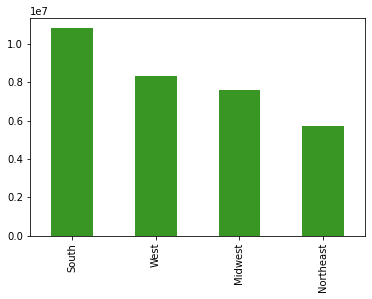

In [13]:
bar_orders_by_region = ords_prods_all['region'].value_counts().plot.bar(color = '#399625')

In [14]:
bar_orders_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_by_region.png'))

In [15]:
pd.options.display.max_columns = None
ords_prods_all.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,price_range,busiest_day,busiest_days,period_of_day,busiest_periods,max_order,loyalty_flag,mean_spend,spend_flag,median_days_since_prior_order,customer_frequency,Gender,STATE,Age,n_dependants,fam_status,income,department,region
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,6am-11am,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,beverages,South
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,Mid-range product,Regularly busy,Slowest days,6am-11am,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,beverages,South
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,Mid-range product,Regularly busy,Slowest days,12pm-5pm,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,beverages,South
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,Mid-range product,Least busy,Slowest days,6am-11am,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,beverages,South
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,Mid-range product,Least busy,Slowest days,12pm-5pm,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,beverages,South


## 04. Using crosstab to identify high spend regions

In [16]:

crosstab = pd.crosstab(ords_prods_all['spend_flag'], ords_prods_all['region'], dropna = False)
crosstab

region,Midwest,Northeast,South,West
spend_flag,,,,
High spender,156125,108342,210180,160807
Low spender,7447425,5619802,10591015,8139334


In [17]:
crosstab.to_clipboard()

High spenders are customers that spend an averge of $10 or more per product.
Low spenders are customers that spend an average of less than $10 per product. 

The South has the largest population of high and low spenders while the Northeast has the smallest population of high and low spenders.

Overall, there are more low spenders in each region than high spenders. 

## 05. Creating a subset excluding low activity customers 

In [18]:
# Creating a subset excluding low activity customers  

high_activity_customers = ords_prods_all[ords_prods_all ['max_order'] >= 5]


In [19]:
# checking that customers with orders 5 or less have been removed from subset

pd.options.display.max_rows = None
high_activity_customers ['max_order'].value_counts()

99    1172192
8      812591
6      812005
9      810789
7      804689
5      793797
10     773779
11     770174
12     745105
13     736887
14     734577
15     696679
17     662582
16     656315
18     622113
19     614278
20     595818
22     594124
21     581036
23     534770
24     530372
25     522429
26     503656
27     488122
28     461380
30     459249
29     459231
31     449750
32     424867
34     418517
33     414137
36     399238
37     375018
40     367626
35     366429
39     357828
41     348396
38     348151
43     337454
44     335135
50     334675
42     331852
47     329749
46     317544
45     317071
49     300874
48     292753
53     285926
51     285926
52     285142
54     240308
56     237536
55     227900
57     200838
58     193093
60     192204
59     188515
61     174435
62     164292
64     161210
63     159589
65     154915
66     134079
67     132374
68     126343
71     122107
73     118004
74     115448
69     111995
70     104015
72     100217
75    

In [20]:
high_activity_customers.shape

(30991542, 29)

## 06. Pie chart of products purchased by loyalty_flag

In [21]:
# Count of products purchased by loyalty_flag

high_activity_customers ['loyalty_flag'].value_counts()

Regular customer    15890458
Loyal customer      10293434
New customer         4807650
Name: loyalty_flag, dtype: int64

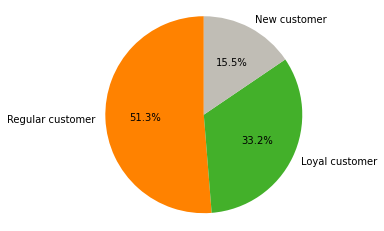

In [22]:
# Pie chart of products purchased by loyalty_flag

labels = 'Regular customer','Loyal customer', 'New customer'
sizes = high_activity_customers ['loyalty_flag'].value_counts()
colors = ['#ff8200','#43b02a','#C0BDB5']

pie_products_by_customer_loyalty, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 

plt.show()

In [23]:
pie_products_by_customer_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_products_by_customer_loyalty.png'))

Almost half of the products that are purchased on Instacart are purchased by customers that are regular customers, meaning they have made anywhere between 10 and 40 orders. Another 32% of products are purchased by loyal customers that have made more than 40 orders. 19% of products are purchased by new customers that have made 10 or less orders. 

## 07. Bar chart of products purchased by department 

In [24]:
# count of orders by department

high_activity_customers ['department'].value_counts(dropna=False)


produce            9079276
dairy eggs         5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           677073
meat seafood        674785
personal care       424362
babies              410392
international       255991
alcohol             144627
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

<AxesSubplot:xlabel='Number of orders'>

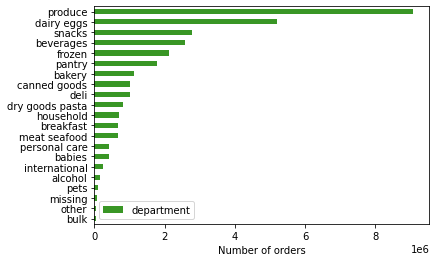

In [25]:
# Count of products purchased by department


bar_orders_by_department = high_activity_customers ['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(color=['#399625'], fontsize=10)
plt.xlabel('Number of orders', fontsize=10)
plt.legend(fontsize=10)

bar_orders_by_department


The most popular items purchased on IC are produce products followed by eggs. 

In [26]:
bar_orders_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_by_department.png'))

## 08. Customer demographics graphs 

In [27]:
# Value counts for fam_status
high_activity_customers ['fam_status'].value_counts()

married                             21762270
single                               5099036
divorced/widowed                     2647661
living with parents and siblings     1482575
Name: fam_status, dtype: int64

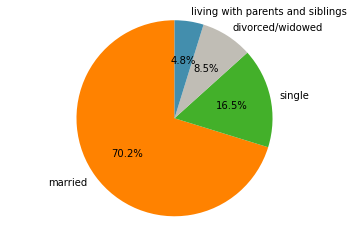

In [28]:
# pie chart of fam_status counts 

labels = 'married','single', 'divorced/widowed', 'living with parents and siblings'
sizes = high_activity_customers ['fam_status'].value_counts()
colors = ['#ff8200','#43b02a','#C0BDB5','#438EAD']

pie_fam_status, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 

plt.show()

In [29]:
pie_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_fam_status.png'))

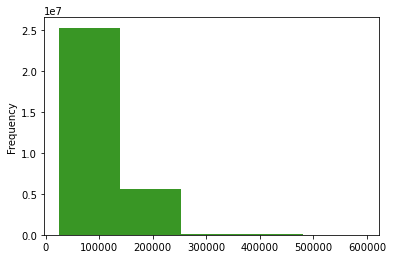

In [30]:
# histogram of income 

hist_income = high_activity_customers ['income'].plot.hist(bins = 5,color = '#399625')

In [31]:
# descriptive statistics of income column 

high_activity_customers['income'].describe()

count    3.099154e+07
mean     9.967335e+04
std      4.313946e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

In [32]:
hist_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_income.png'))

<AxesSubplot:ylabel='Frequency'>

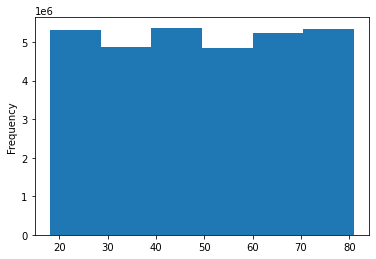

In [33]:
# Histogram of ages

high_activity_customers['Age'].plot.hist(bins = 6)

In [34]:
# checking data type of age

high_activity_customers['Age'].dtype

dtype('int64')

In [35]:
# descriptive statistics of age column 

high_activity_customers['Age'].describe()

count    3.099154e+07
mean     4.946796e+01
std      1.848522e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [36]:
# For loop to categorize ages and make a list 

age_bracket = []

for x in high_activity_customers['Age']:
  if x >= 18 and x <27:
    age_bracket.append("Young adult")
  elif x >= 27 and x < 65:
    age_bracket.append("Adult")
  else:
    age_bracket.append("Senior")

In [37]:
# checking that each age has been sorted into an age bracket 

len(age_bracket)

30991542

In [38]:
# adding list of age brackets to high_activity_customers dataframe

high_activity_customers ['age_bracket'] = age_bracket

/var/folders/j6/vcs2ps6j3pl6z1p5390gh8h00000gn/T/ipykernel_2182/3562610976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_activity_customers ['age_bracket'] = age_bracket


In [39]:
# getting a count of customer orders in each age bracket

high_activity_customers ['age_bracket'].value_counts()

Adult          18430717
Senior          8202484
Young adult     4358341
Name: age_bracket, dtype: int64

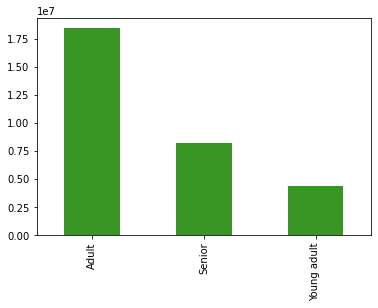

In [40]:
# bar chart of customer orders by age bracket 

bar_age_brackets = high_activity_customers ['age_bracket'].value_counts().plot.bar(color = '#399625')

In [41]:
bar_age_brackets.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_brackets.png'))

In [42]:
# Spot checking that ages were categorized into the correct age brackets
range = (27, 30)

check_data = high_activity_customers.loc[high_activity_customers['Age'].isin(range)]

check_data.head(50)

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,price_range,busiest_day,busiest_days,period_of_day,busiest_periods,max_order,loyalty_flag,mean_spend,spend_flag,median_days_since_prior_order,customer_frequency,Gender,STATE,Age,n_dependants,fam_status,income,department,region,age_bracket
260,2126069,98,3,0,9,25.0,196,Soda,7,9.0,Mid-range product,Busiest day,Busiest days,6am-11am,Average orders,14,Regular customer,8.028000,Low spender,25.0,Non-frequent customer,Female,Virginia,30,2,married,58569,beverages,South,Adult
261,2210120,98,7,5,14,5.0,196,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,12pm-5pm,Most orders,14,Regular customer,8.028000,Low spender,25.0,Non-frequent customer,Female,Virginia,30,2,married,58569,beverages,South,Adult
262,681011,98,9,3,9,30.0,196,Soda,7,9.0,Mid-range product,Regularly busy,Slowest days,6am-11am,Average orders,14,Regular customer,8.028000,Low spender,25.0,Non-frequent customer,Female,Virginia,30,2,married,58569,beverages,South,Adult
263,2846344,98,11,4,13,15.0,196,Soda,7,9.0,Mid-range product,Least busy,Slowest days,12pm-5pm,Most orders,14,Regular customer,8.028000,Low spender,25.0,Non-frequent customer,Female,Virginia,30,2,married,58569,beverages,South,Adult
264,747431,98,12,6,13,30.0,196,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,12pm-5pm,Most orders,14,Regular customer,8.028000,Low spender,25.0,Non-frequent customer,Female,Virginia,30,2,married,58569,beverages,South,Adult
265,2383054,98,13,4,11,30.0,196,Soda,7,9.0,Mid-range product,Least busy,Slowest days,6am-11am,Average orders,14,Regular customer,8.028000,Low spender,25.0,Non-frequent customer,Female,Virginia,30,2,married,58569,beverages,South,Adult
266,1993729,98,14,5,8,8.0,196,Soda,7,9.0,Mid-range product,Regularly busy,Regularly busy,6am-11am,Average orders,14,Regular customer,8.028000,Low spender,25.0,Non-frequent customer,Female,Virginia,30,2,married,58569,beverages,South,Adult
267,3031033,98,2,3,21,24.0,21386,Smartwater,7,11.0,Mid-range product,Regularly busy,Slowest days,6pm-11pm,Average orders,14,Regular customer,8.028000,Low spender,25.0,Non-frequent customer,Female,Virginia,30,2,married,58569,beverages,South,Adult
268,3027046,98,4,4,7,11.0,21386,Smartwater,7,11.0,Mid-range product,Least busy,Slowest days,6am-11am,Average orders,14,Regular customer,8.028000,Low spender,25.0,Non-frequent customer,Female,Virginia,30,2,married,58569,beverages,South,Adult
269,335423,98,5,4,16,21.0,21386,Smartwater,7,11.0,Mid-range product,Least busy,Slowest days,12pm-5pm,Most orders,14,Regular customer,8.028000,Low spender,25.0,Non-frequent customer,Female,Virginia,30,2,married,58569,beverages,South,Adult


In [43]:
# exporting subset

high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_high_activity_customers.pkl'))